# Head model and forward computation

In [57]:
from saflow import FS_SUBJDIR, BIDS_PATH
import mne

subjects_dir = FS_SUBJDIR
subject = '04'
raw_fname ='/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_meg.fif'
trans = '/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_trans.fif'

from mne_bids import BIDSPath
BIDS_PATH = '/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/'

preproc_bidspath = BIDSPath(subject=subject, 
                        task='gradCPT', 
                        run=bloc, 
                        datatype='meg', 
                        suffix='meg',
                        processing='clean',
                        root=BIDS_PATH + '/derivatives/preprocessed/')
 
print(preproc_bidspath.fpath)

/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/derivatives/preprocessed/sub-04/meg/sub-04_task-gradCPT_run-02_proc-clean_meg


In [20]:
# Everything
info = mne.io.read_info(raw_fname)
src = mne.setup_source_space(
    subject, spacing="oct6", add_dist="patch", subjects_dir=subjects_dir
)

conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(
    subject=subject, ico=4, conductivity=conductivity, subjects_dir=subjects_dir
)
bem = mne.make_bem_solution(model)

fwd = mne.make_forward_solution(
    raw_fname,
    trans=trans,
    src=src,
    bem=bem,
    meg=True,
    eeg=False,
    mindist=5.0,
    n_jobs=None,
    verbose=True,
)


    Read 5 compensation matrices
Setting up the source space with the following parameters:

SUBJECTS_DIR = /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects
Subject      = sub-04
Surface      = white
Octahedron subdivision grade 6



>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/lh.white...
Mapping lh sub-04 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/157736 selected to source space (oct = 6)

Loading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/rh.white...
Mapping rh sub-04 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 4098/160237 selected to source space (oct = 6)

Calculating patch information (limit=0.0 mm)...
    Computing patch statistics...
    Patch information added...
    Computing patch statistics..

Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/bem/inner_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/bem/outer_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/bem/outer_skin.surf


/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


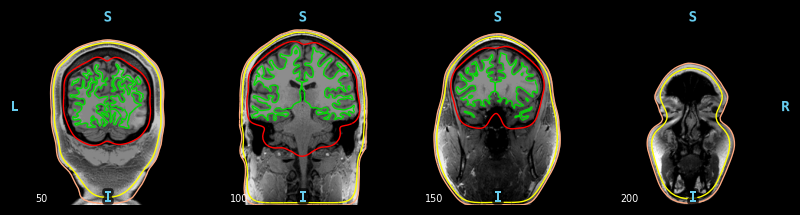

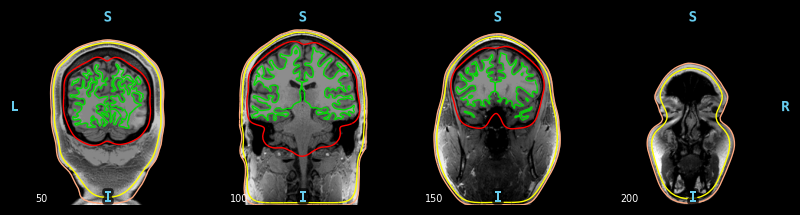

In [3]:

plot_bem_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    brain_surfaces="white",
    orientation="coronal",
    slices=[50, 100, 150, 200],
)

mne.viz.plot_bem(**plot_bem_kwargs)

In [5]:

info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
mne.viz.plot_alignment(
    info,
    trans,
    subject=subject,
    dig=True,
    meg=["helmet", "sensors"],
    subjects_dir=subjects_dir,
    surfaces="head-dense",
)

    Read 5 compensation matrices


RuntimeError: 

In [19]:
# Setup source space
src = mne.setup_source_space(
    subject, spacing="oct6", add_dist="patch", subjects_dir=subjects_dir
)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects
Subject      = sub-04
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/lh.white...
Mapping lh sub-04 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/157736 selected to source space (oct = 6)

Loading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/rh.white...
Mapping rh sub-04 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-04/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loade

Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/inner_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/outer_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/outer_skin.surf


/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


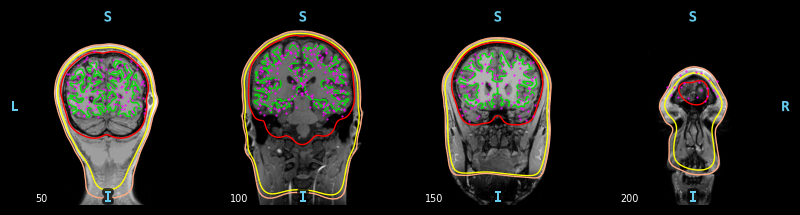

In [5]:
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

Sphere                : origin at (0.0 0.0 40.0) mm
              radius  : 90.0 mm
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz

Reading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz...

Setting up the sphere...
Surface CM = (   0.0    0.0   40.0) mm
Surface fits inside a sphere with radius   90.0 mm
Surface extent:
    x =  -90.0 ...   90.0 mm
    y =  -90.0 ...   90.0 mm
    z =  -50.0 ...  130.0 mm
Grid extent:
    x =  -95.0 ...   95.0 mm
    y =  -95.0 ...   95.0 mm
    z =  -50.0 ...  135.0 mm
57798 sources before omitting any.
24365 sources after omitting infeasible sources not within 0.0 - 90.0 mm.
20377 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -95.00 mm
     0.000000

/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


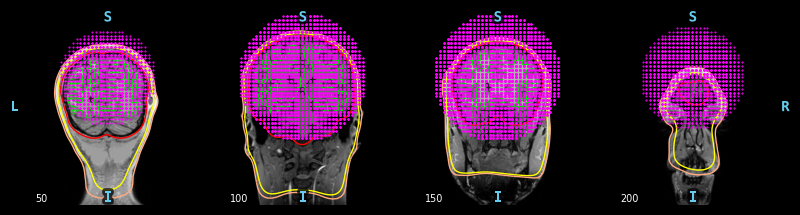

In [6]:
sphere = (0.0, 0.0, 0.04, 0.09)
vol_src = mne.setup_volume_source_space(
    subject,
    subjects_dir=subjects_dir,
    sphere=sphere,
    sphere_units="m",
    add_interpolator=False,
)  # just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

In [7]:

fig = mne.viz.plot_alignment(
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces="white",
    coord_frame="mri",
    src=src,
)
mne.viz.set_3d_view(
    fig,
    azimuth=173.78,
    elevation=101.75,
    distance=0.30,
    focalpoint=(-0.03, -0.01, 0.03),
)

RuntimeError: 

Boundary surface file : /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/inner_skull.surf
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz

Reading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz...

Loaded bounding surface from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -1.1  -24.3   24.7) mm
Surface fits inside a sphere with radius  100.4 mm
Surface extent:
    x =  -70.9 ...   68.9 mm
    y = -108.8 ...   75.0 mm
    z =  -51.7 ...   95.2 mm
Grid extent:
    x =  -75.0 ...   70.0 mm
    y = -110.0 ...   75.0 mm
    z =  -55.0 ...  100.0 mm
36480 sources before omitting any.
28622 sources after omitting infeasible sources not within 0.0 - 100.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface and at least    5.0 mm away (wil

/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


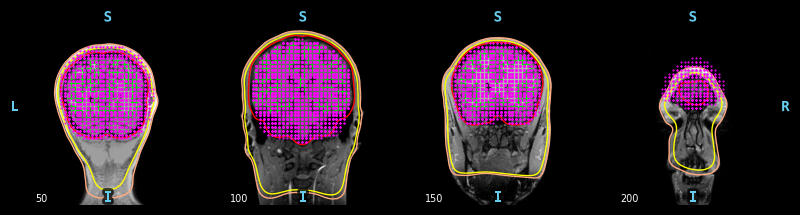

In [ ]:
surface = subjects_dir + '/' + subject + "/bem" + "/inner_skull.surf"
vol_src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, surface=surface, add_interpolator=False
)  # Just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

In [9]:
conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(
    subject=subject, ico=4, conductivity=conductivity, subjects_dir=subjects_dir
)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -1.10 -24.30  24.65 mm
Surfaces passed the basic topology checks.
Complete.

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [10]:
fwd = mne.make_forward_solution(
    raw_fname,
    trans=trans,
    src=src,
    bem=bem,
    meg=True,
    eeg=False,
    mindist=5.0,
    n_jobs=None,
    verbose=True,
)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=149584, n_used=258>, <surface (rh), n_vertices=150656, n_used=258>] MRI (surface RAS) coords, subject 'sub-05', ~27.6 MB>
MRI -> head transform : /media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_trans.fif
Measurement data      : sub-05_task-gradCPT_run-02_meg.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 516 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999880 -0.007040  0.013768      -0.88 mm
     0.005410  0.993349  0.115013      17.97 mm
    -0.014486 -0.114925  0.993269      21.96 mm
     0.000000  0.000000  0.000000       1.00

Read 299 MEG channels from info
Read 29 MEG compensation channels from info
5 compensation data sets in info
Setting up compensation data...
    Desired compensation data (3)

In [11]:
print(f"Before: {src}")
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=149584, n_used=258>, <surface (rh), n_vertices=150656, n_used=258>] MRI (surface RAS) coords, subject 'sub-05', ~27.6 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=149584, n_used=258>, <surface (rh), n_vertices=150656, n_used=258>] head coords, subject 'sub-05', ~27.6 MB>


In [12]:
leadfield = fwd["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Leadfield size : 270 sensors x 1548 dipoles


In [13]:
fwd_fixed = mne.convert_forward_solution(
    fwd, surf_ori=True, force_fixed=True, use_cps=True
)
leadfield = fwd_fixed["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)




    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 270 sensors x 516 dipoles


# Source localization with MNE

In [3]:
# epoching
tmin = -0.5#0.426 # 1/2 ISI after stimulus onset = stimulus rising 50%
tmax = 1.278 # 3/2 ISI after stimulus onset = stimulus decreasing 50%
raw = mne.io.read_raw_fif(raw_fname, preload=True)

picks = mne.pick_types(
    raw.info, meg=True, ref_meg=True, eeg=False, eog=False, stim=False
)
### Set some constants for epoching
baseline = (None, -0.3)#None  # (None, -0.05)
# reject = {'mag': 4e-12}
try:
    events = mne.find_events(raw, min_duration=1 / raw.info["sfreq"], verbose=False)
except ValueError:
    events = mne.find_events(raw, min_duration=2 / raw.info["sfreq"], verbose=False)
event_id = {"Freq": 21, "Rare": 31, "Resp":99}
epochs = mne.Epochs(
    raw,
    events=events,
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    baseline=baseline,
    reject=None,
    picks=picks,
    preload=True,
)

Opening raw data file /media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_meg.fif...
    Read 5 compensation matrices
    Range : 0 ... 587999 =      0.000 ...   489.999 secs
Ready.


Current compensation grade : 3
Reading 0 ... 587999  =      0.000 ...   489.999 secs...
Not setting metadata
1175 matching events found
Setting baseline interval to [-0.5, -0.3] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1175 events and 2135 original time points ...
1 bad epochs dropped


ds directory : /home/hyruuk/GitHub/cocolab/saflow_data/bids/sub-emptyroom/ses-20190704/meg/sub-emptyroom_ses-20190704_task-noise_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
       0.00   80.00    0.00 mm <->    0.00   80.00    0.00 mm (orig :  -56.57   56.57 -270.00 mm) diff =    0.000 mm
       0.00  -80.00    0.00 mm <->    0.00  -80.00    0.00 mm (orig :   56.57  -56.57 -270.00 mm) diff =    0.000 mm
      80.00    0.00    0.00 mm <->   80.00   -0.00   -0.00 mm (orig :   56.57   56.57 -270.00 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /home/hyruuk/GitHub/cocolab/saflow_data/bids/sub-emptyroom/ses-20190704/meg/sub-emptyroom_ses-20190704_task-noise_meg.ds/sub-emptyroom_ses-20190704_task-noise_meg.meg4: 
    System clock channe

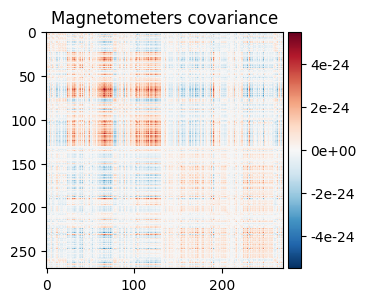

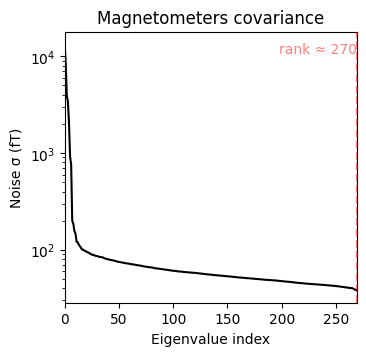

In [4]:
# Compute noise covariance
noise_file = '/home/hyruuk/GitHub/cocolab/saflow_data/bids/sub-emptyroom/ses-20190704/meg/sub-emptyroom_ses-20190704_task-noise_meg.ds'

noise_raw = mne.io.read_raw_ctf(noise_file, preload=True)
noise_cov = mne.compute_raw_covariance(
    noise_raw, method=["shrunk", "empirical"], rank=None, verbose=True
)
fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, raw.info)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


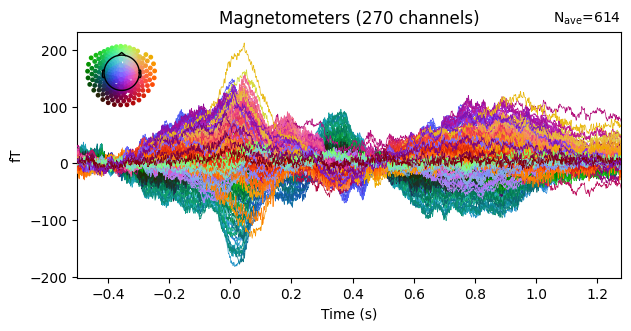

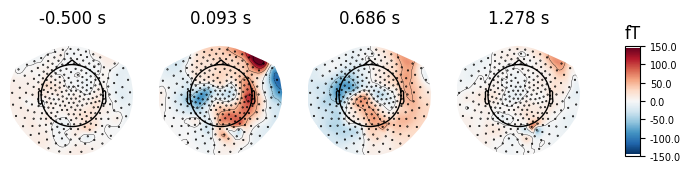

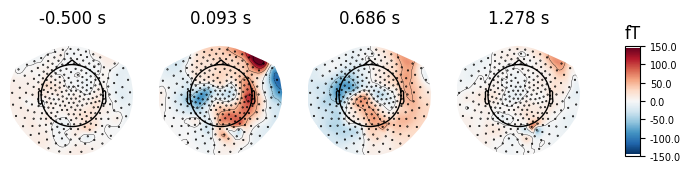

In [5]:
# Create evoked of response, just to check
import numpy as np
evoked = epochs['Resp'].average().pick("meg")
evoked.plot(time_unit="s")
evoked.plot_topomap()

In [21]:
from mne.minimum_norm import make_inverse_operator, apply_inverse
# Make inverse operator
inverse_operator = make_inverse_operator(
    evoked.info, fwd, noise_cov, loose=0.2, depth=0.8
)


# Compute inverse solution
method = "MNE"
snr = 3.0
lambda2 = 1.0 / snr**2
stc, residual = apply_inverse(
    evoked,
    inverse_operator,
    lambda2,
    method=method,
    pick_ori=None,
    return_residual=True,
    verbose=True,
)

Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...


    [done]
Computing inverse operator with 270 channels.
    270 out of 270 channels remain after picking
Removing 5 compensators from info because not all compensation channels were picked.
Selected 270 channels
Creating the depth weighting matrix...
    270 magnetometer or axial gradiometer channels
    limit = 8066/8194 = 10.017026
    scale = 5.29062e-11 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
Removing 5 compensators from info because not all compensation channels were picked.
Computing rank from covariance with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 270 dim * 1.8e+02  max singular value)
    Estimated rank (mag): 270
    MAG: rank 270 computed from 270 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 8.35

[Text(0.5, 0, 'time (ms)'), Text(0, 0.5, 'MNE value')]

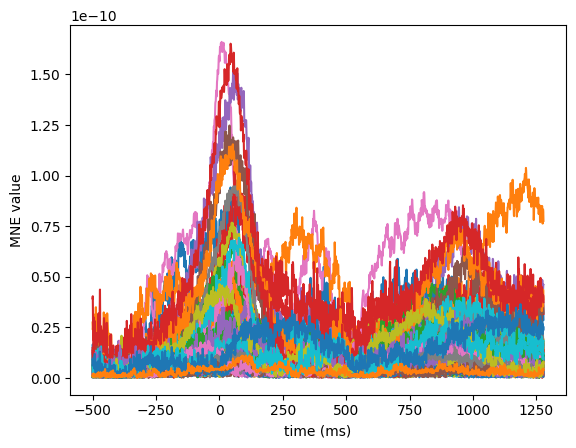

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(1e3 * stc.times, stc.data[::100, :].T)
ax.set(xlabel="time (ms)", ylabel="%s value" % method)

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


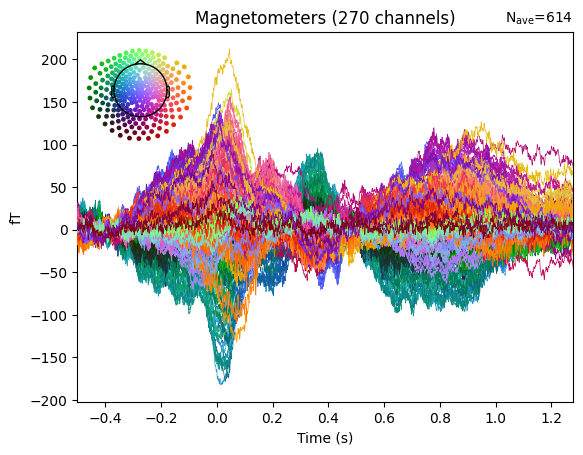

TypeError: 'Axes' object is not iterable

In [14]:
# Examine the original data and the residual after fitting:
fig, axes = plt.subplots(1, 1)
evoked.plot(axes=axes)
for ax in axes:
    for text in list(ax.texts):
        text.remove()
    for line in ax.lines:
        line.set_color("#98df81")
residual.plot(axes=axes)

In [23]:
vertno_max, time_max = stc.get_peak(hemi="rh")

surfer_kwargs = dict(
    hemi="rh",
    subjects_dir=FS_SUBJDIR,
    clim=dict(kind="value", lims=[8, 12, 15]),
    views="lateral",
    initial_time=time_max,
    time_unit="s",
    size=(800, 800),
    smoothing_steps=10,
)
brain = stc.plot(**surfer_kwargs)
brain.add_foci(
    vertno_max,
    coords_as_verts=True,
    hemi="rh",
    color="blue",
    scale_factor=0.6,
    alpha=0.5,
)

RuntimeError: 

In [53]:
stc

<SourceEstimate | 8194 vertices, subject : sub-04, tmin : -500.0 (ms), tmax : 1278.3333333333335 (ms), tstep : 0.8333333333333334 (ms), data shape : (8194, 2135), ~133.5 MB>

In [51]:
stc.plot()

Using control points [4.10025777e-11 4.96721524e-11 1.78247544e-10]


RuntimeError: 

In [52]:
residual

<Evoked | 'Resp' (average, N=614), -0.5 – 1.2783 s, baseline -0.5 – -0.3 s, 299 ch, ~5.3 MB>

In [50]:
mne.utils.set_config("SUBJECTS_DIR", '/media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects', set_env=True)

In [62]:
    raw_bidspath = BIDSPath(subject=subject, 
                            task='gradCPT', 
                            run=bloc, 
                            datatype='meg', 
                            suffix='meg',
                            extension='.ds',
                            root=BIDS_PATH)

In [63]:
raw_bidspath.fpath

PosixPath('/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-04/meg/sub-04_task-gradCPT_run-02_meg.ds')